## Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

### Problem Statement

In the fast paced taxi booking sector, making the most of revenue is essential for long term success and driver happiness. Our goal is to use data-driven
insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on
fare pricing by focusing on the relationship between payment type and fare amount.

### Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis 
testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

### Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for
drivers, without negatively impacting customer experience?

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv("yellow_tripdata_2020-01.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis

#### ***VendorID*** -- A code indicating the TPEP provider that provided the record.
    
#### ***tpep_pickup_datetime*** -- The date and time when the meter was engaged.

#### ***tpep_dropoff_datetime*** -- The date and time when the meter was disengaged.

#### ***passenger_count*** -- The number of passengers in the vehicle. This is a driver-entered value.

#### ***trip_distance*** -- The elapsed trip distance in miles reported by the taximeter.

#### ***PULOCATIONID*** -- TLC taxi zone in which the taximeter was engaged.

#### ***DOLOCATIONID*** -- TLC taxi zone in which the taximeter was engaged.

#### ***RateCodeID*** -- The final rate code in effect at the end of the trip.

#### ***store_and_fwd_flag*** -- This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store

####                           and forward,” because the vehicle did not have a connection to the server.

#### ***payment_type*** -- A numeric code signifying how the passenger paid for the trip.

#### ***fare_amount*** -- The time-and-distance fare calculated by the meter.

#### ***extra*** -- Miscellaneous extras and surcharges. Currently, this only includes. The $0.50  and  $1 rush hour and overnight charges.

#### ***mta_tax*** -- $0.50 MTA tax that is automatically triggered based on the metered rate in use.

#### ***tip_amount*** -- Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.

#### ***tolls_amount*** -- Total amount of all tolls paid in trip.

#### ***improvement_surcharge*** -- $0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied 

####                                in 2015

#### ***total_amount*** -- The total amount charged to passengers. Does not include cash tips.

df.shape

In [4]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [5]:
# Calculating duration from the pickup and dropoff datetime in minutes

# converting pickup and dropoff to datetime
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

# subtracting the pickup time from dropoff time to get duration
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# converting into minutes
df['duration'] = df['duration'].dt.total_seconds()/60

In [6]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [7]:
df['duration'] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df['duration'] = df['duration'].dt.total_seconds()/60

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [9]:
df = df[["passenger_count","payment_type","fare_amount","trip_distance","duration"]]

In [10]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [13]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [14]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(3007861, 5)

In [17]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [18]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [19]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count'] >0)&(df['passenger_count']<6)]

In [20]:
df.shape

(2780283, 5)

In [21]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)

In [22]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


Upon reviewing the provided statistics, it's evident that the minimum values for trip distance, fare amount, and duration are negative, which is unrealistic and invalid for further analysis. Consequently, we will eliminate these negative values from the dataset.

Furthermore, observing the maximum and 50th percentile values, it's possible that the data contains significant outliers, particularly high values. These outliers need to be addressed and removed to ensure the integrity of the analysis.

In [23]:
# filtering the records for only positive values
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

<Axes: xlabel='payment_type', ylabel='fare_amount'>

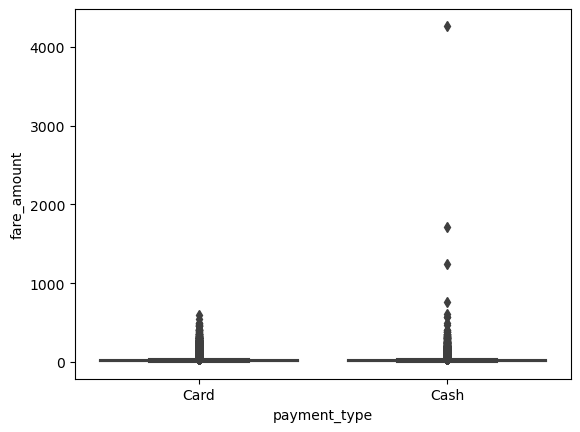

In [24]:
# check for the outliers
sns.boxplot(data=df, y="fare_amount", x="payment_type")

In [25]:
# removing outliers using interquartile range for the numerical variables
for col in ['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

   # Define lower and upper bounds for outliers
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    # Filter out outliers
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.

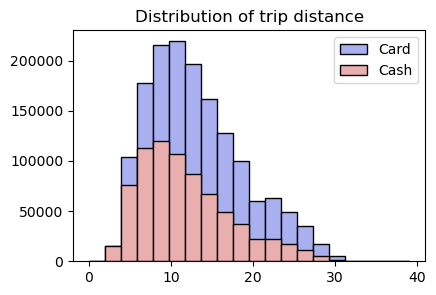

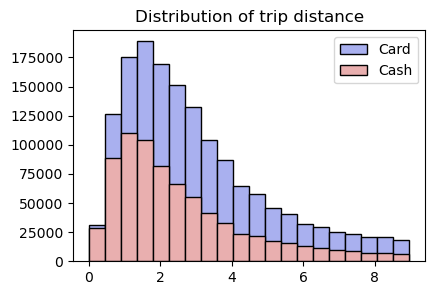

In [26]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#A9B0EF', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#E9AFAF', label = 'Cash')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#A9B0EF', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#E9AFAF', label = 'Cash')
plt.legend()
plt.show()

In [27]:
# calculating the mean and standard deviation group by on payment type 
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

Now, in order to examine the passenger's preference regarding their choice of payment method, we will assess the proportion of the two payment types. To provide a visual representation, we have opted to utilize a pie chart. This graphical depiction will offer a clear and intuitive understanding of the distribution between the two payment methods chosen by passengers.

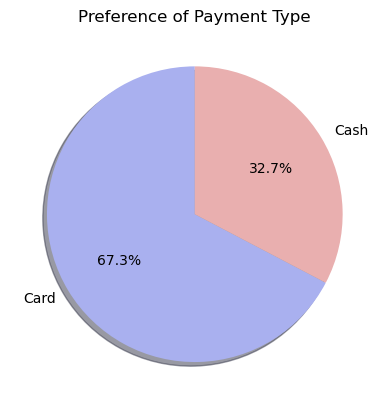

In [28]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels =df['payment_type'].value_counts().index, startangle =90,
        shadow = True, autopct = '%1.1f%%', colors = ['#A9B0EF', '#E9AFAF'])
plt.show()

In [29]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [30]:
# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [31]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [32]:
# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df1 = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df1['payment_type'] = ['Card', 'Cash']
df1.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df1.iloc[1,1:] = passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


Subsequently, we aim to conduct an analysis of the payment types in relation to the passenger count. Our objective is to investigate if there are any changes in preference contingent upon the number of passengers traveling in the cab.

To facilitate this examination, we have employed a visualization technique known as a stacked bar plot. This method is particularly advantageous for comparing the percentage distribution of each passenger count based on the payment method selected. Through this graphical representation, we can gain insights into potential variations in payment preferences across different passenger counts.

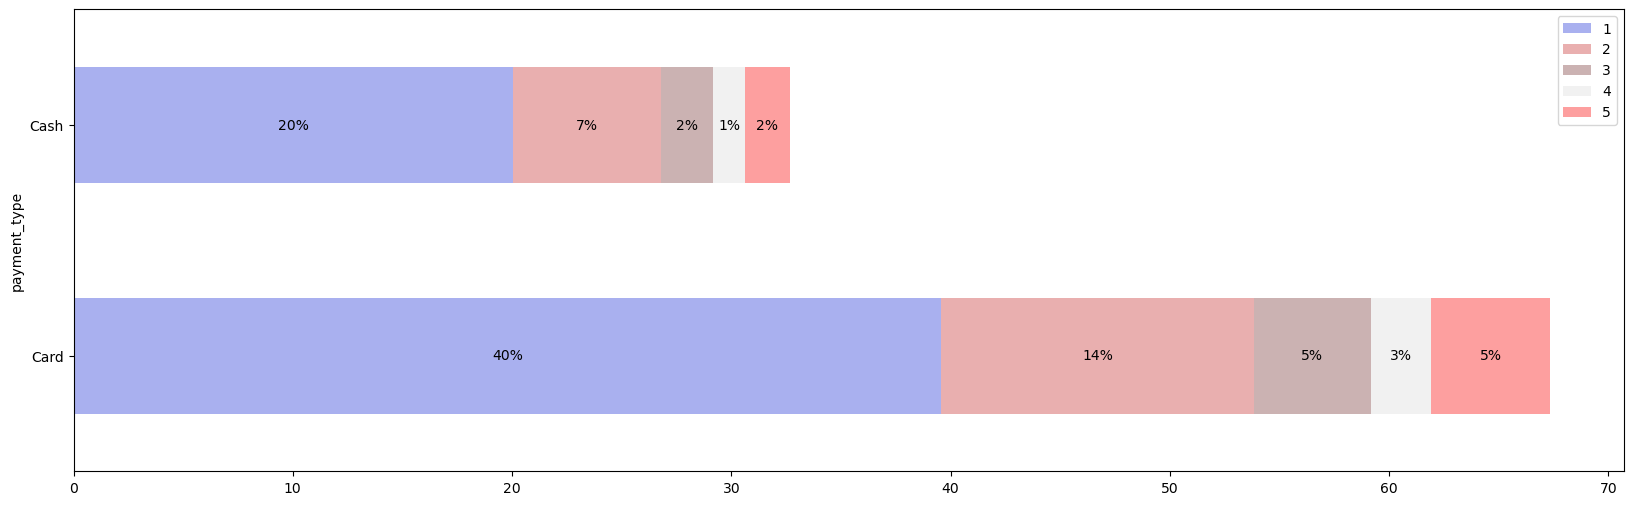

In [33]:
fig, ax = plt.subplots(figsize=(20, 6))
df1.plot(x= 'payment_type', kind = 'barh', stacked = True, ax= ax, color = ['#A9B0EF', '#E9AFAF', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

#Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:0.00f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

# Hypothesis Testing

**Null hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash.

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

In [34]:
import statsmodels.api as sm

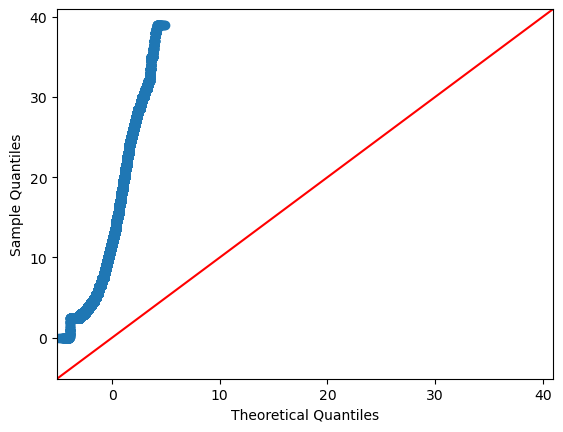

In [35]:
#create Q-Q plot with 45-degree line added to plot
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, Z-Test will not be good for this. That's why we will use T test.

Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.

In the analysis of NYC Yellow Taxi Trip Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

In [36]:
# sample 1
card_sample = df[df['payment_type']=='Card']['fare_amount']
# sample 2
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [37]:
# performing t test on both the different sample
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistic', t_stats, 'p_value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T statistic 169.2111527245052 p_value 0.0

Reject the null hypothesis


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

# Recommendations

Encourage customers to pay with credit cards to capitalize on the potential forgenerating more revenue for taxi cab drivers.

Implement strategies such as offering incentives or discounts for credit cardtransactions to incentivize customers to choose this payment method.

Encourage customers to pay with credit cards capitalize on the potential for generating more revenue taxi cab drivers. 